<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='../../pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='../../pics/miw.PNG'/></a>
</div>
</a>

# Practicum Convolution Neural Nets (CNN) Deel 1

**Doel: Toepassen Convolutional Neural Networks**

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch
import torchvision.transforms.functional as F
import torchvision.transforms as T
from torchvision.io import ImageReadMode
from torchvision.io import read_image
from torch import nn
import matplotlib.pyplot as plt

<h3>Globale variabelen</h3>

In [2]:
forestDirectory = '../../pics/2750/Forest'
industrialDirectory = '../../pics/2750/Industrial'

### Context

<p>
Dit practicum bestaat uit twee onderdelen
<ol>
    <li>Het toepassen van een convolutie en pooling filter</li>
    <li><b>Het bouwen en trainen van een eenvoudig convolutional neural net dat een industrieterrein van een bos kan onderscheiden.</b></li>
</ol>    
Voor beide oefeningen gebruiken we de EuroSAT_RGB dataset
</p>

<img src='../../pics/eurosat_cnn.png' length=65% width=65%>

<h3>Data Collection</h3>
<p>
We gebruiken Images uit de <a href="https://github.com/phelber/EuroSAT">EuroSat dataset</a> die gemaakt zijn met de Sentinel-2 sateliet. Elke image is een 64x64 pixels foto van Europees aardoppervlak op een hoogte van 10 meter. De images zijn te categoriseren in Highway, Industrial, Pasture, PermanentCrop, Residential, River en SeaLake.
</p>
<img src=../../pics/eurosat_overview_small.jpg length=40% width=40%>
<p>
Download <a href="http://madm.dfki.de/files/sentinel/EuroSAT.zip">EuroSAT.zip</a> en kopieer daaruit de directory 2750 naar opdrachten/practica/pics.      
<strong>Voeg het pad naar de directory 2750 toe aan .gitignore zodat je de plaatjes niet naar je remote git repository pusht</strong>
</p>    

## Opdrachten

### Opdracht 3: pooling uitvoeren

Met PyTorch Functional kunnen we ook een pooling filter toepassen.

In [3]:
def plotImgs(lImg, rImg):
    plt.style.use('dark_background') 
    plt.rcParams["font.size"] = 12
    plt.rcParams["figure.figsize"] = (12, 7)

    fig, (axL, axR) = plt.subplots(ncols=2, constrained_layout=True)
    imL = axL.imshow(np.clip(lImg, 0, 1), interpolation="none")
    imR = axR.imshow(np.clip(rImg, 0, 1), interpolation="none")    

AvgPool2d(kernel_size=3, stride=1, padding=0)


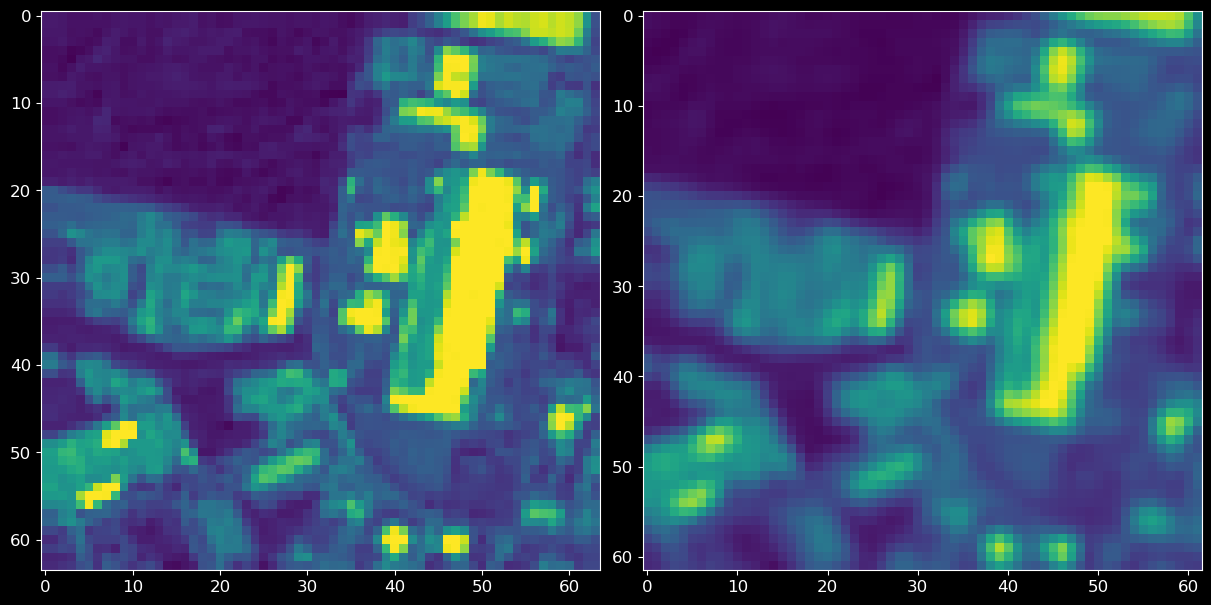

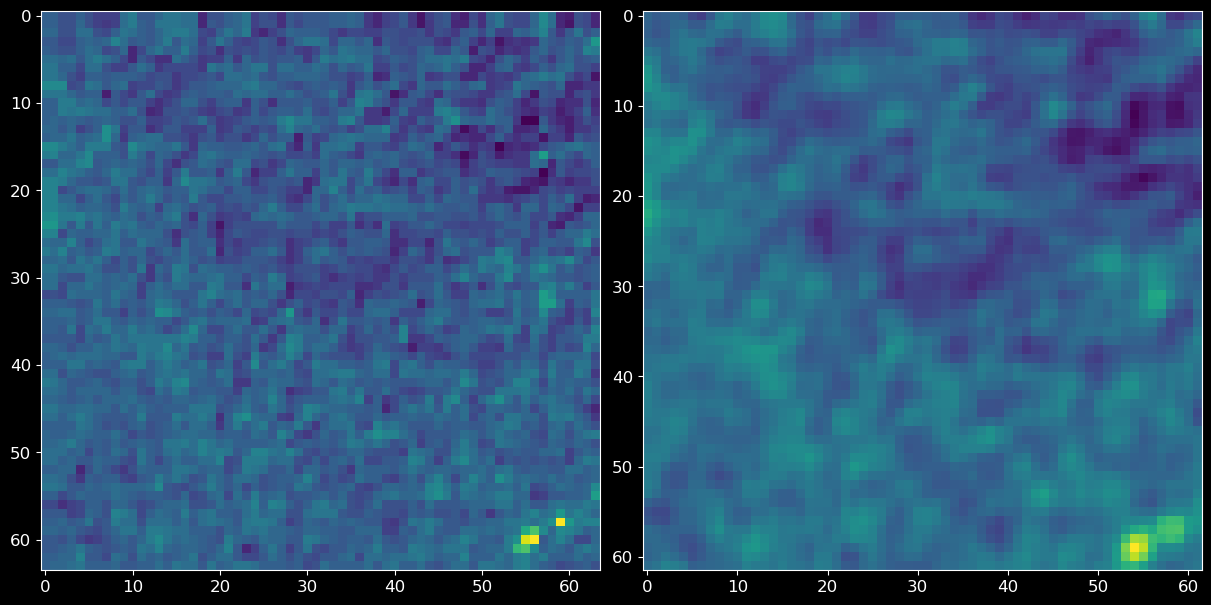

In [4]:
# a. Bekijk de pooling opties en kies de juiste avg-variant

# b. Pas pooling toe op de afbeelding 'Industrial_1.jpg':
industrial = read_image(industrialDirectory + '/Industrial_1.jpg', mode=ImageReadMode.GRAY)
industrial = T.ConvertImageDtype(torch.float).forward(industrial)

# Create average pooling layer
avg_pool = nn.AvgPool2d(3, 1, 0)

print(avg_pool)

industrial_pool = avg_pool.forward(industrial)

plotImgs(industrial.squeeze(), industrial_pool.squeeze())

#    - Kies een 3x3 kernel en een stride van 1

# c. Herhaal de bovenstaande stappen voor een willekeure Forest Image

# load forest image
forest = read_image(forestDirectory + '/Forest_7.jpg', mode=ImageReadMode.GRAY)
forest = T.ConvertImageDtype(torch.float).forward(forest)

forest_pool = avg_pool.forward(forest)

plotImgs(forest.squeeze(), forest_pool.squeeze())


### Reflectie

Komt de visuele uitkomst overeen met je verwachtingen?

AvgPool2d(kernel_size=6, stride=3, padding=0)
MaxPool2d(kernel_size=6, stride=3, padding=0, dilation=1, ceil_mode=False)


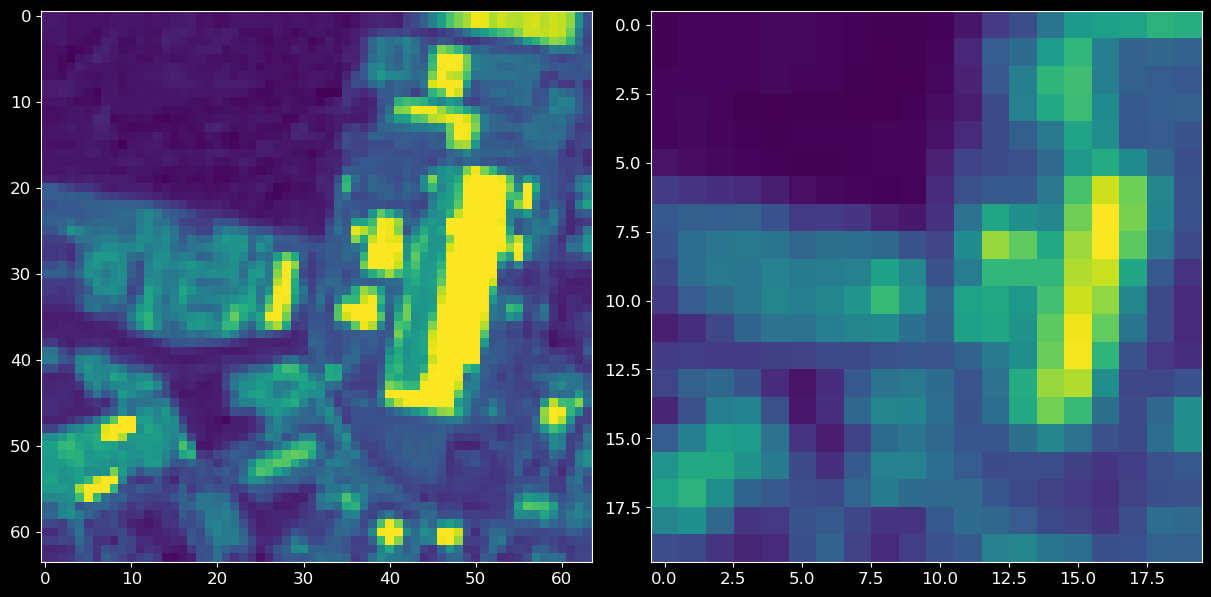

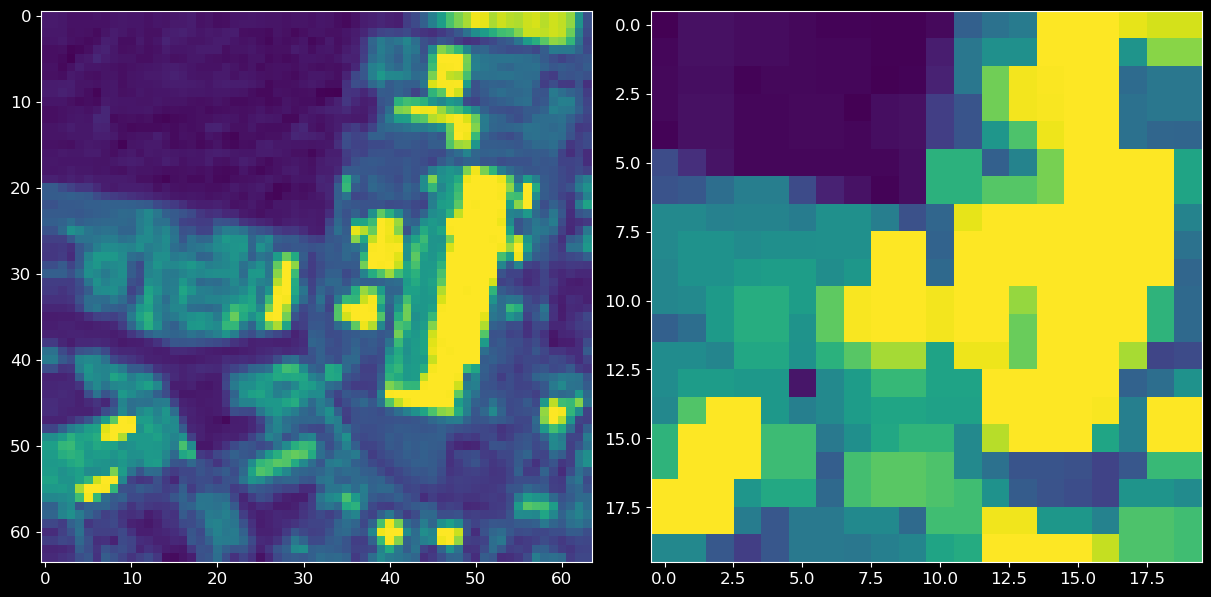

In [5]:
# Ja dit komt overeen, want het pakt de average van 9 naburige pixels
# Extra: varieer de stride en de kernel
# Create average pooling layer
avg_pool_kernel_6_stride_3 = nn.AvgPool2d(6, 3)

print(avg_pool_kernel_6_stride_3)

industrial_pool_kernel_6_stride_3 = avg_pool_kernel_6_stride_3.forward(industrial)

plotImgs(industrial.squeeze(), industrial_pool_kernel_6_stride_3.squeeze())

# Create max pooling layer
max_pool_kernel_6_stride_3 = nn.MaxPool2d(6, 3)

print(max_pool_kernel_6_stride_3)

industrial_maxpool_kernel_6_stride_3 = max_pool_kernel_6_stride_3.forward(industrial)

plotImgs(industrial.squeeze(), industrial_maxpool_kernel_6_stride_3.squeeze())



### Reflectie

Wat is de invloed van padding en stride op de uitkomst?

De shape van de uiteindelijke output veranderd

### Opdracht 4: convolutie en pooling combineren

Een convolutional neural net combineert afwisselend convolutie en pooling in de eerste lagen.

We kunnen nu het effect van deze combinatie onderzoeken:

- Convolutie
- Pooling

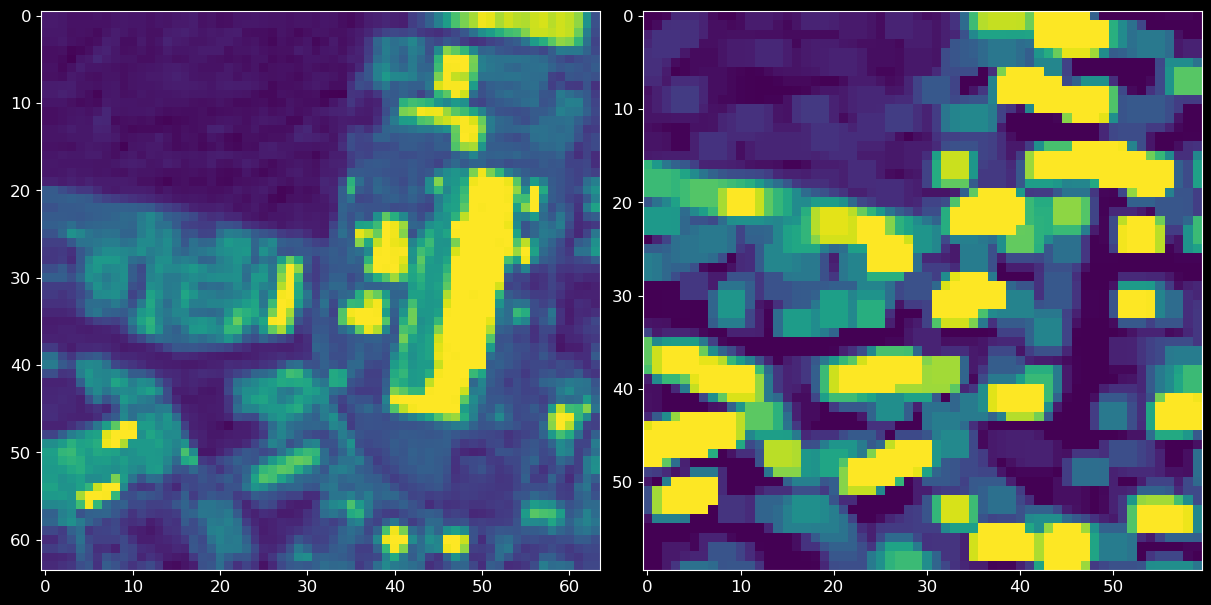

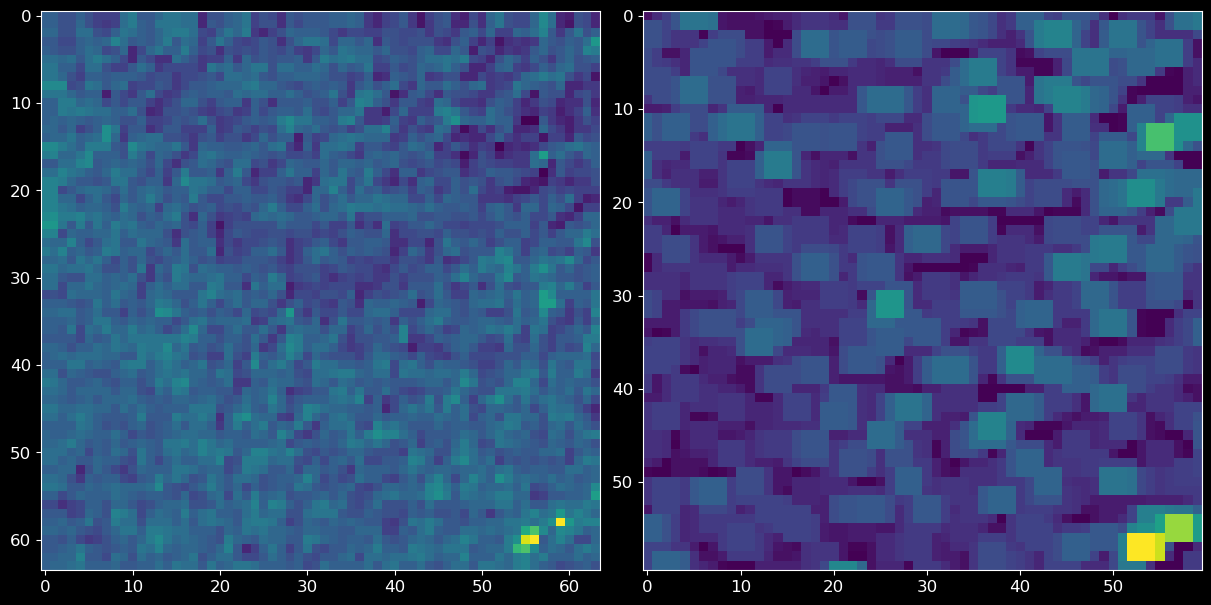

In [6]:
# a. Bedenk en maak zelf een 2d convolution filter
# create kernel to detect edges
edgeFilter = torch.Tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# reshape to match the expected input shape of Conv2d
edgeFilter = edgeFilter.unsqueeze(0).unsqueeze(0)

# create conv3d filter with kernel_size = 3, stride = 1 and padding = 0
conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0, bias=False)

# add edgeFilter to Conv2d as weight
conv.weight = nn.Parameter(edgeFilter)

# b. Bedenk en maak zelf een 2d pooling filter
# Create max pooling layer
max_pool_kernel_3_stride_1 = nn.MaxPool2d(3, 1, 0)

# c. Pas nu de convolutie toe op 'Industrial_1.jpg'
# apply filter with forward pass
industrialConv = conv.forward(industrial)

# d. Pas vervolgens een pooling toe op de uitkomst van c.
industrialPool = max_pool_kernel_3_stride_1.forward(industrialConv)

plotImgs(industrial.squeeze(), industrialPool.squeeze().detach().numpy())

# e. Doe hetzelfde voor de afbeelding 'Forrest_1.jpg'

forestConv = conv.forward(forest)

# d. Pas vervolgens een pooling toe op de uitkomst van c.
forestPool = max_pool_kernel_3_stride_1.forward(forestConv)

plotImgs(forest.squeeze(), forestPool.squeeze().detach().numpy())


### Reflectie

- Verschilt de uitkomst veel van de combinatie veel met convolutie en pooling?
- En zijn de afbeeldingen 'Industrial_1.jpg' en 'Forrest_1.jpg' beter te onderscheiden?

In [7]:
# Ja maakt veel uit en de afbeeldingen zijn beter te onderscheiden

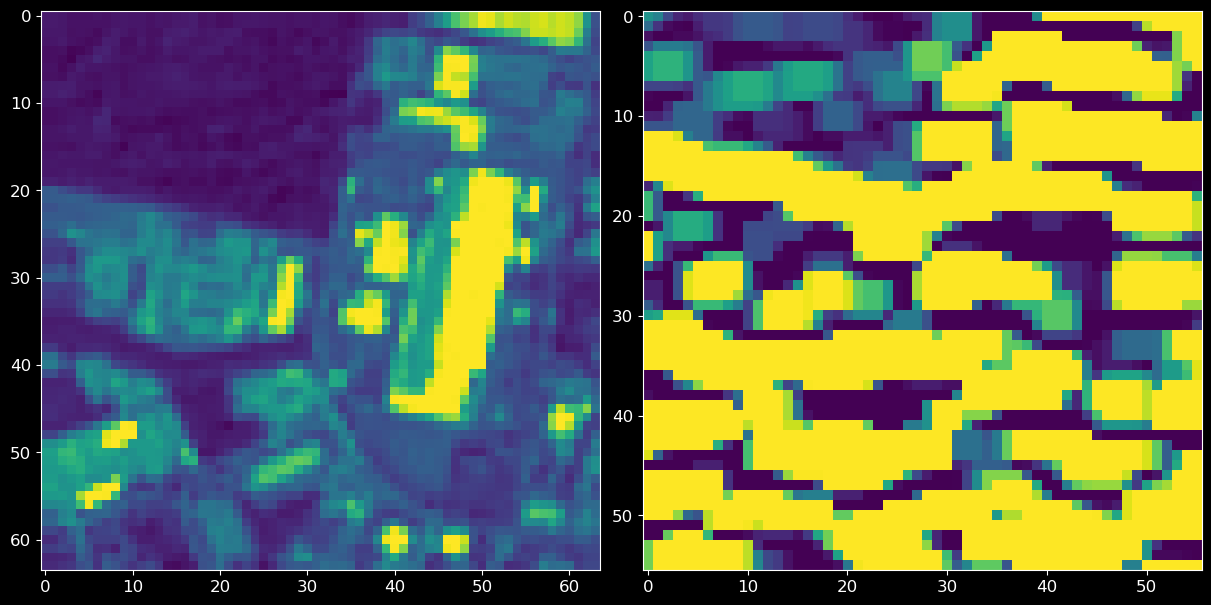

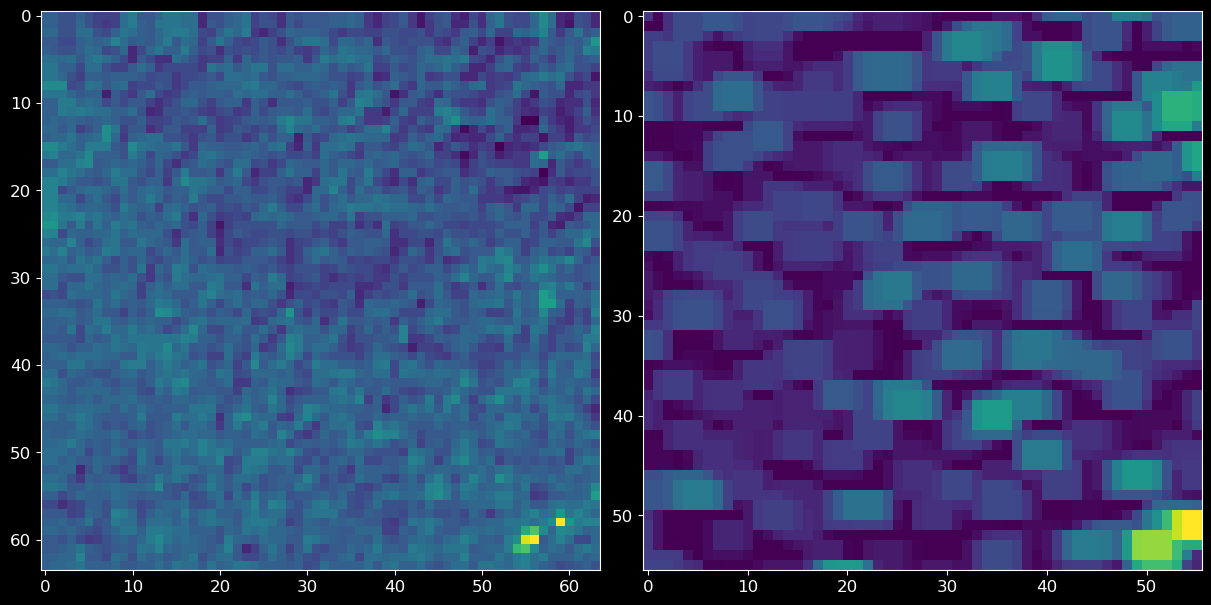

In [8]:
# Extra: bereid de combinatie uit met nog een extra convolutie en pooling laag
conv2 = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=0, bias=False)

conv2.weight = nn.Parameter(edgeFilter)
max_pool_2 = nn.MaxPool2d(3, 1, 0)

# Conv 1
industrialConv = conv.forward(industrial)

# max pool 1
industrialPool = max_pool_kernel_3_stride_1.forward(industrialConv)

# Conv 2
industrialConv2 = conv2.forward(industrialPool)

# Max pool 2
industrialPool2 = max_pool_2.forward(industrialConv2)

plotImgs(industrial.squeeze(), industrialPool2.squeeze().detach().numpy())

# forest
# Conv 1
forestConv = conv.forward(forest)

# max pool 1
forestPool = max_pool_kernel_3_stride_1.forward(forestConv)

# Conv 2
forestConv2 = conv2.forward(forestPool)

# Max pool 2
forestPool2 = max_pool_2.forward(forestConv2)

plotImgs(forest.squeeze(), forestPool2.squeeze().detach().numpy())


### Reflectie

Heeft een extra laag veel invloed op de onderscheidbaarheid van de afbeeldingen?

In [9]:
# Ja nog meer

### Opdracht 5: dataset prepareren

Om het neurale netwerk te trainen moeten we de dataset opsplitsen in labels (Y, de categoriën) en input afbeeldingen (X).

In [18]:
# a. Denk nog eens terug aan hoe we kruisjes van rondjes van elkaar konden onderscheiden

#    - Hoe representeerden we de labels?
#    - Hoe representeerden we de kruisjes en de rondjes?
#    - Hoe combineerden we dit tot een dataset?

# b. Hoe kunnen we de labels 'Industrials' en 'Forrest' dus representeren?

# c. Vorm nu een dataset voor 'Industrials' en 'Forrest'

# d. Extra: implementeer bovenstaande via een Dataset en DataLoader class
#           (zie https://pytorch.org/docs/stable/data.html voor verdere details)

import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader, random_split

# custom Image Dataset
class CustomImageDataset(Dataset):
    def __init__(self, img_directories, transform=None, target_transform=None):
        self.idx_to_class = {
            0: "industrial",
            1: "forest"
        }
        # create empty lists for image directories and image labels
        self.img_dir = []
        self.img_labels = []
        # loop over image dirs in list
        for dir in img_directories:
            for filename in os.listdir(dir):
                # create full filename path
                imgFile = os.path.join(dir, filename)

                if ".jpg" in imgFile and ":Zone" not in imgFile:
                    # add filename path to img_dir list
                    self.img_dir.append(imgFile)
                    
                    # add label to label list
                    label = imgFile.split('/')[4]
                    if label == "Industrial":
                        label_id = [0, 1]
                    else:
                        label_id = [1, 0]
                    self.img_labels.append(label_id)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        # read image from image path
        image = read_image(self.img_dir[idx]).float()
        # get label from img label list
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, torch.FloatTensor(label)

# create list of image directories
forestDirectory = '../../pics/2750/Forest'
industrialDirectory = '../../pics/2750/Industrial'
inferenceDirectory = '../../pics/2750/Inference'
image_dirs = [forestDirectory, industrialDirectory]

# create dataset from image directories
dataset = CustomImageDataset(image_dirs)
inference_dataset = CustomImageDataset([inferenceDirectory])
print(dataset.img_labels)
# create a random generator
generator1 = torch.Generator().manual_seed(16)
# create a train test split with 70% train, 30% test
train_dataset, test_dataset = random_split(dataset, [0.8, 0.2], generator=generator1)

# check length of train and test dataset
print(len(train_dataset), len(test_dataset))
# create train and test dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# train_features, train_labels = next(iter(train_dataloader))

test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
test_features, test_labels = next(iter(test_dataloader))

inference_dataloader = DataLoader(inference_dataset, batch_size=32, shuffle=False)

print(test_features[0], test_labels[0])


[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0],

### Opdracht 6: CNN ontwerpen

We kunnen een convolutional neural net opbouwen met convolutie, pooling en fully connected lagen. Hieronder definiëren we een topologie om een afbeeldingen van 32 x 32 te onderscheiden.

De topologie is gebaseerd op de blog post 'A simple CNN with Pytorch'. Dus zie het artikel voor extra details.

In [26]:
#-------------------------------------------------------

class CNN(nn.Module):
    
    #-------------------------------------------------------
    
    def __init__(self):
        
        # Because we inherit from Module base class
        super().__init__()
        
        # RGB input, 6 filters, kernel of 5 x 5
        self.conv1 = nn.Conv2d(3, 6, 5)
        
        # Filter is 2 x 2 with a stride of 2 (defined once, used two times)
        self.pool = nn.MaxPool2d(2, 2)
        
        # in_channels = 6 because self.conv1 output has 6 channels
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # Fully connected layer matched on output of conv2 layer
        self.fc1 = nn.Linear(16 * 13 * 13, 120)
        
        # Add dropout to create more efficient network
        self.dropout = nn.Dropout(p=0.8)

        # Fully connected layer
        self.fc2 = nn.Linear(120, 84)
        
        # We only have 2 labels
        self.fc3 = nn.Linear(84, 2)

        self.sigmoid = nn.Sigmoid()
        
    #-------------------------------------------------------
        
    def forward(self, x):
        
        # Convolution with relu layers
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        
        # To match the output of the conv2 layer onto the first fully connected layer
        # Like reshape() but makes no copy (reuses underlaying data)
        x = x.view(-1, 16 * 13 * 13)
        
        # Fully connected layers
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = nn.functional.relu(self.fc2(x))
        
        # No activation on final layer 
        x = self.fc3(x)
    
        return self.sigmoid(x)

#-------------------------------------------------------

In [27]:
from torchsummary import summary
summary(CNN().to("cuda"), input_size=(3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 60, 60]             456
         MaxPool2d-2            [-1, 6, 30, 30]               0
            Conv2d-3           [-1, 16, 26, 26]           2,416
         MaxPool2d-4           [-1, 16, 13, 13]               0
            Linear-5                  [-1, 120]         324,600
           Dropout-6                  [-1, 120]               0
            Linear-7                   [-1, 84]          10,164
            Linear-8                    [-1, 2]             170
           Sigmoid-9                    [-1, 2]               0
Total params: 337,806
Trainable params: 337,806
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.31
Params size (MB): 1.29
Estimated Total Size (MB): 1.65
-------------------------------------------

### Opdracht 7: CNN trainen

Het trainen van een CNN is identiek aan het trainen van een fully connected (a.k.a. dense) netwerk.

In [29]:
# a. Ga voor jezelf na welke stappen een typisch trainingsproces bevat

# b. Bekijk de blog post 'A simple CNN in Python' en zet de training op
cnn = CNN()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

running_loss = 0 
printfreq = 32
for epoch in range(10):
    total = 0  # keeps track of how many images we have processed 
    correct = 0  # keeps track of how many correct images our net predicts
    for i, data in enumerate(train_dataloader):
        inputs, labels = data
        cnn.train()
        optimizer.zero_grad()
        outputs = cnn(inputs)  # forward pass 
        # get indices of max value
        _, predicted = torch.max(outputs, 1)
        _, label_idx = torch.max(labels, 1)
        # increment total items
        total += labels.size()[0]
        # increment total correct items
        correct += (predicted == label_idx).sum().item()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % printfreq == printfreq-1:  
            print(epoch, i+1, running_loss / printfreq)
            running_loss = 0
    print(f"Train Accuracy: {(correct/total):.1%}")

    
    total = 0  # keeps track of how many images we have processed 
    correct = 0  # keeps track of how many correct images our net predicts
    running_loss = 0
    printfreq = 16
    with torch.no_grad():
        for i, data in enumerate(test_dataloader):
            cnn.eval()
            inputs, labels = data
            outputs = cnn(inputs) # forward pass
            # get indices of max value
            _, predicted = torch.max(outputs, 1)
            _, label_idx = torch.max(labels, 1)
            # increment total items
            total += labels.size()[0]
            # increment total correct items
            correct += (predicted == label_idx).sum().item()
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            if i % printfreq == printfreq-1:  
                print(epoch, i+1, running_loss / printfreq)
                running_loss = 0
        
        print(f"Test Accuracy: {(correct/total):.1%}")

        for i, data in enumerate(inference_dataloader):
            cnn.eval()
            inputs, labels = data
            outputs = cnn(inputs) # forward pass
            # get indices of max value
            _, predicted = torch.max(outputs, 1)
            _, label_idx = torch.max(labels, 1)
            # increment total items
            total += labels.size()[0]
            # increment total correct items
            correct += (predicted == label_idx).sum().item()
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            if i % printfreq == printfreq-1:  
                print(epoch, i+1, running_loss / printfreq)
                running_loss = 0
        
        print(f"Inference Accuracy: {(correct/total):.1%}")
# c. Het voorbeeld bevat geen validatie tijdens de trainingsstap (epoch)

#    - Bekijk het Notebook met de de postcode FastScan
#      en bereid de training uit met validatie in de trainingsloop

0 32 0.7073739022016525
0 64 0.7013458758592606
0 96 0.7038503978401423
0 128 0.6885631456971169
Train Accuracy: 48.5%
0 16 0.692293468862772
0 32 0.6922848001122475
Test Accuracy: 87.3%
Inference Accuracy: 81.2%
1 16 1.067711979150772
1 32 0.6494013704359531
1 48 0.6232622154057026
1 64 0.5840001739561558
1 80 0.5285637062042952
1 96 0.48700936511158943
1 112 0.38387767784297466
1 128 0.37757476419210434
Train Accuracy: 70.0%
1 16 0.45702617429196835
1 32 0.44499352388083935
Test Accuracy: 85.8%
Inference Accuracy: 82.5%
2 16 0.7103386409580708
2 32 0.3299050945788622
2 48 0.3383534662425518
2 64 0.3364342898130417
2 80 0.33152048476040363
2 96 0.32950044609606266
2 112 0.3327238969504833
2 128 0.32537438347935677
Train Accuracy: 98.1%
2 16 0.3170813862234354
2 32 0.31524547562003136
Test Accuracy: 99.7%
Inference Accuracy: 91.7%
3 16 0.7186968345195055
3 32 0.3291167449206114
3 48 0.32054474018514156
3 64 0.33260764740407467
3 80 0.3341600298881531
3 96 0.3211462628096342
3 112 0.345

In [25]:
m = nn.Sigmoid()
input = torch.randn(2)
output = m(input)
output

tensor([0.4310, 0.2857])

### Opdracht 8: dropout toevoegen

Om het netwerk effectiever te trainen wordt dropout toegepast.

PyTorch maakt het toevoegen van dropout makkelijk.

In [ ]:
# a. Bekijk het artikel Using Dropout Regularization in PyTorch Models (zie sources)

# b. Pas nu dropout toe op een hidden layer van je model

# c. Hertrain je model

#    - Let er op dat je je model evalueert in eval() mode
#    - Heeft de dropout invloed op de accuracy van je model?

### Reflectie

- Wat gebeurt er als de dropout groot is (bijvoobeeld 0.9)?

### Bronnen

[EuroSAT project](https://github.com/phelber/eurosat)

[Pytorch Neural Nets](https://pytorch.org/docs/stable/nn.html)

[Kernels](https://en.wikipedia.org/wiki/Kernel_(image_processing))

[A simple CNN with Pytorch](https://tomroth.com.au/pytorch-cnn)

[A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)

[Using Dropout Regularization in PyTorch Models](https://machinelearningmastery.com/using-dropout-regularization-in-pytorch-models)